In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sys
sys.path.append('Q:\\python\\lib')
import Sun
#import AIA
#from radloss import *
#from hydro_static import *
#import chianti.core as ch


In [2]:
def d(x, order = 1):
    if (order == 1):
        return np.gradient(x, edge_order = 1)
    if (order == 2):
        out = np.roll(x,1)+np.roll(x,-1)-2*x
        out[0] = out[1]
        out[-1] = out[-2]
    return out


def trisol(D,U,V,B):
    _D = np.array(D)
    _U = np.array(U)
    _V = np.array(V)
    _B = np.array(B)
    
    n = D.shape[0]
    
    for i in range(1,n):
        _D[i] -= _U[i-1]*_V[i-1]/_D[i-1]
        _B[i] -= _B[i-1]*_V[i-1]/_D[i-1]
        
    for i in range(n-2,-1,-1):
        _B[i] -= _B[i+1]*_U[i]/_D[i+1]
        
    return _B/_D

#def radiate(T,p):
#    return (p/(2*Sun.k_b*T))**2*2e-22#radloss(T)

#U = np.array([1,1], dtype = np.float)
#V = np.array([1,1], dtype = np.float)
#D = np.array([-2,-2,-2], dtype = np.float)
#B = np.array([1,2,3], dtype = np.float)

#trisol(D,U,V,B)

array([-2.5, -4. , -3.5])

In [49]:
nx = 1e2
nt = np.int(1e2)

dx = 1
k = 1

T0 = np.ones(nx, dtype = np.float)
T0[50] = 10.


T = np.array(T0)


for i in range(0,np.int(1e3)):
    d = k*T**2.5
    q = np.max(d)

    D = -(q+2)*d
    D[0] = 1
    D[-1] = 1

    U = np.roll(d,-1)
    U = U[:-1]
    U[0] = 0

    V = np.roll(d,1)
    V = V[1:]
    V[-1] = 0

    B = T*d
    B = 5./7*(np.roll(B,-1)+np.roll(B,1)) - (q+2*5./7)*B
    B[0] = T[0]
    B[-1] = T[-1]

    T = trisol(D,U,V,B)

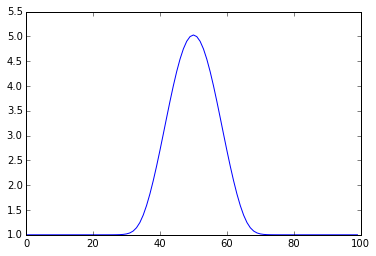

In [50]:
plt.plot(T)